In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None) 

plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")

colors = {
    'bg': '#EFE8E8',
    'text': '#513838',
    
    'red': '#DC3545',
    'blue': "#4476C2",
    'cyan': '#0AA2C0',
    'green': '#1AA179',
    'purple': '#7121F3',
    'orange': '#FD7E14',
    'yellow': '#FFC107',
    'pink': '#D63384',
    'white_green': "#64B099"
}

custom_palette = [
    colors['blue'], colors['red'], colors['green'], 
    colors['orange'], colors['purple'], colors['cyan']
]

custom_params = {
    "figure.facecolor": colors['bg'],
    "axes.facecolor": colors['bg'],
    "savefig.facecolor": colors['bg'],
    
    "text.color": colors['text'],
    "axes.labelcolor": colors['text'],
    "xtick.color": colors['text'],
    "ytick.color": colors['text'],
    "font.family": "sans-serif",
    
    "axes.grid": True,
    "grid.color": colors['text'],
    "grid.alpha": 0.15,
    "grid.linestyle": "-",
    "grid.linewidth": 0.8,
    
    "axes.spines.left": True,
    "axes.spines.bottom": True,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.edgecolor": colors['text'],
    "axes.linewidth": 0.8,
    
    "lines.linewidth": 1.5,
    "lines.markersize": 6,
}

sns.set_theme(
    context="talk",
    style="whitegrid",
    rc=custom_params,
    palette=custom_palette
)

<Figure size 1400x1000 with 0 Axes>

In [35]:
df = pd.read_excel('df.xlsx')
df

,review_dttm,finish_dttm,id_client,company,review_mark,review_emotion,review_source,business_line,product,reason,review_theme,subtheme,review_text,solution_flg,gender_cd,education_level_cd,marital_status_cd,children_cnt,citizenship_country,segment_name,subscription_important_flg,new_flg,influencer_flg,age_segment,csat_score
0,2025-02-18 15:41:00,2025-02-18 16:56:49.353,fb30834209a9c7f60612c64b82c75ffa,Банк,1,Негативный,banki.ru,кредитные карты,кредитная карта,Не определено,тарифы и условия,консультация по продукту,"Непрозрачные условия, скрытые комсисии. Почему...",проблема решена,M,NaN,UNM,0.0,РФ,Доходные,0.0,0.0,0.0,Молодежь,NaN
1,2025-03-24 20:06:00,2025-03-28 17:42:39.772,6601bfab426e4f56cc1e44d859683763,Страховая,1,Негативный,banki.ru,страховая,каско,Не определено,страховое событие,жалоба по страховому случаю,"Обратился по каско , влетел камень в лобовое с...",проблема решена,M,NaN,NaN,NaN,РФ,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-07-08 07:40:43,2025-07-08 10:29:04.740,f1f8eff66eaf2289f61deec744871d6b,Банк,5,Позитивный,banki.ru,депозитные продукты,дебетовая карта,Не определено,мп/лк/терминал,установка/обновление приложения,Я уже очень давно пользуюсь услугами Тбанка и ...,не указано,M,GRD,MAR,0.0,РФ,Малодоходные,0.0,0.0,0.0,Взрослые,NaN
3,2025-08-07 22:51:48,2025-08-08 09:35:34.593,5ca669878eaf593f68c10e163246357b,SME,5,Позитивный,banki.ru,sme,расчетный счет,Не определено,дополнительные услуги,консультация по услуге,"Уважаемое руководство Т- Банка,\n\n\nНастоящим...",не указано,F,GRD,MAR,0.0,РФ,Высокодоходные без ПМ,0.0,0.0,1.0,Взрослые,NaN
4,2025-02-13 21:38:40,2025-02-14 08:04:44.643,7a436100b113ce78c8a7a02974521a16,Банк,5,Позитивный,banki.ru,депозитные продукты,дебетовая карта,Не определено,кэшбек,корректировка кэшбека,Выбрал на текущий месяц повышенный кэшбек на к...,не указано,M,NaN,NaN,0.0,РФ,Доходные,0.0,0.0,1.0,Сеньоры,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56815,2025-05-23 18:29:43,2025-05-23 19:25:21.222,19a90f722e0088dbd5c1140326475d4c,Страховая,5,Позитивный,banki.ru,страховая,взр,Не определено,страховое событие,консультации по существующему страховому событию,Отдыхали в новый год в Тель-Авиве с ребёнком. ...,не указано,M,NaN,DIV,0.0,РФ,NaN,NaN,NaN,NaN,NaN,NaN
56816,2025-09-26 10:16:00,2025-09-26 13:27:02.360,3e5ccb5ffa7055f82085ccd18b7190c4,Банк,5,Позитивный,sravni.ru,поддержка сотрудников,не определено,Не определено,тарифы и условия,консультация по продукту,Здравствуйте я очень довольна работой группы п...,не указано,F,GRD,CIV,0.0,РФ,Доходные,0.0,0.0,0.0,Сеньоры,NaN
56817,2025-10-23 18:41:00,2025-10-23 19:20:28.205,ff8dee14ae0b2c22593ab20ffb9d8e26,Банк,5,Позитивный,sravni.ru,депозитные продукты,дебетовая карта,Не определено,мп/лк/терминал,консультация по интерфейсу,Банк и прилодение\nПо моему мнению лучший банк...,не указано,M,NaN,MAR,0.0,РФ,Доходные,0.0,0.0,0.0,Взрослые,NaN
56818,2025-09-02 13:12:13,2025-09-02 13:35:01.523,b8deb649421f64fc4a5b6c71b350f528,Банк,5,Позитивный,banki.ru,премиальные сервисы,premium,Не определено,"платежи, переводы и операции",отмена / оспаривание,Огромная благодарность сотруднику Т-Банка (Лео...,не указано,M,NaN,NaN,0.0,РФ,Доходные,0.0,0.0,1.0,Взрослые,NaN


In [36]:
print(df['id_client'].nunique())
print(df['review_source'].nunique())

print("Первая дата:", df['review_dttm'].min())
print("Последняя дата:", df['review_dttm'].max())

49508
20
Первая дата: 2025-01-01 00:00:01
Последняя дата: 2025-11-05 22:16:00


In [37]:
print(df['review_dttm'].isna().sum())
print(df['finish_dttm'].isna().sum())

0
94


До очистки: 56820 строк.
Удалено выбросов: 285 строк.
Осталось: 56535 строк.
Удаляли по границам: [0.00, 456.02] часов.


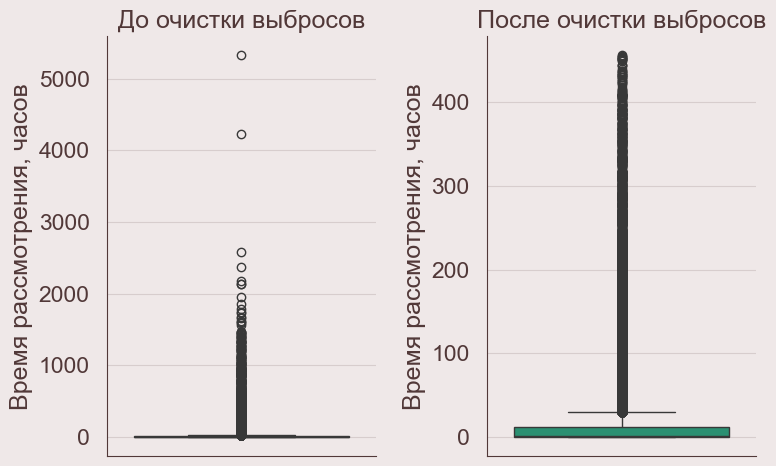

In [38]:
import numpy as np

df['finish_dttm'] = df['finish_dttm'].fillna(df['review_dttm'])

df['review_time'] = (pd.to_datetime(df['finish_dttm']) - pd.to_datetime(df['review_dttm'])).dt.total_seconds() / 3600

before_count = len(df)

lower_bound = 0
upper_bound = df['review_time'].quantile(0.995)

df_clean = df[(df['review_time'] >= lower_bound) & (df['review_time'] <= upper_bound)].copy()
after_count = len(df_clean)
removed_count = before_count - after_count

print(f"До очистки: {before_count} строк.")
print(f"Удалено выбросов: {removed_count} строк.")
print(f"Осталось: {after_count} строк.")
print(f"Удаляли по границам: [{lower_bound:.2f}, {upper_bound:.2f}] часов.")

fig, axes = plt.subplots(1, 2, figsize=(8, 5))

sns.boxplot(y=df['review_time'], ax=axes[0], color=colors['green'], orient='v')
axes[0].set_title("До очистки выбросов")
axes[0].set_ylabel("Время рассмотрения, часов")
axes[0].set_xlabel("")

sns.boxplot(y=df_clean['review_time'], ax=axes[1], color=colors['green'], orient='v')
axes[1].set_title("После очистки выбросов")
axes[1].set_ylabel("Время рассмотрения, часов")
axes[1].set_xlabel("")

plt.tight_layout()
plt.show()

df = df_clean

In [39]:
emotion_map = {
    "Негативный": 0,
    "Позитивный": 1,
}

df["review_emotion"] = df["review_emotion"].map(emotion_map)

product_group_map = {
    'кредитная карта': 'Кредитные карты',
    'каско': 'Страхование',
    'дебетовая карта': 'Дебетовые карты',
    'расчетный счет': 'Бизнес-продукты',
    'кредит наличными под залог недвижимости': 'Залоговые кредиты',
    'брокерский счет': 'Инвестиции и брокерские счета',
    'осаго': 'Страхование',
    'не определено': 'Не определено',
    'взр': 'Страхование',
    'кредит наличными': 'Потребительские кредиты',
    'premium': 'Премиальные продукты',
    'автокредит в салонах': 'Автокредиты',
    'путешествия': 'Lifestyle-сервисы',
    'кредиты': 'Потребительские кредиты',
    'онлайн-бухгалтерия': 'Бизнес-продукты',
    'рефинансирование кн': 'Потребительские кредиты',
    'lifestyle': 'Lifestyle-сервисы',
    'автокредит наличными': 'Автокредиты',
    'долями': 'Рассрочка и кредиты в покупках',
    'рефинансирование': 'Потребительские кредиты',
    'вэд': 'Бизнес-продукты',
    'мобайл': 'Мобильная связь',
    'торговый эквайринг': 'Бизнес-продукты',
    'Не определено': 'Не определено',
    'подписки': 'Подписки',
    'ифл': 'Потребительские кредиты',
    'ипотека на первичном рынке': 'Ипотека и ипотечное рефинансирование',
    'банкоматы': 'Банкоматы',
    'отели': 'Lifestyle-сервисы',
    'ипотека на вторичном рынке': 'Ипотека и ипотечное рефинансирование',
    'интернет эквайринг': 'Бизнес-продукты',
    'накопительный счет': 'Вклады и накопительные продукты',
    'бухгалтерское обслуживание': 'Бизнес-продукты',
    'кубышка': 'Потребительские кредиты',
    'кредит на покупку': 'Рассрочка и кредиты в покупках',
    'collection': 'Проблемная задолженность',
    'инвесткопилка': 'Вклады и накопительные продукты',
    'бизнес-залы': 'Премиальные продукты',
    'рефинансирование автокредита': 'Автокредиты',
    'зарплатный проект': 'Бизнес-продукты',
    'выгода': 'Lifestyle-сервисы',
    'иис': 'Инвестиции и брокерские счета',
    'кредитование покупателей': 'Рассрочка и кредиты в покупках',
    'рефинансирование ипотеки': 'Ипотека и ипотечное рефинансирование',
    'вклад': 'Вклады и накопительные продукты',
    'образовательный кредит': 'Потребительские кредиты',
    'рассрочка по кнопке': 'Рассрочка и кредиты в покупках',
    'junior': 'Дебетовые карты',
    'онлайн-касса': 'Бизнес-продукты',
    'private': 'Премиальные продукты',
    'ипотечное страхование': 'Страхование',
    'совместный счет': 'Вклады и накопительные продукты',
    'бизнес-карта': 'Бизнес-продукты',
    'овернайт': 'Вклады и накопительные продукты',
    'дебетовая карта (black)': 'Дебетовые карты',
    'кредит наличными под залог авто': 'Залоговые кредиты',
    'tinkoff black': 'Дебетовые карты',
    'нс': 'Страхование',
    'депозит': 'Вклады и накопительные продукты',
    'рко': 'Бизнес-продукты',
    'самозанятые': 'Бизнес-продукты',
    'tinkoff black premium': 'Дебетовые карты',
    'консьерж': 'Lifestyle-сервисы',
    'bravo': 'Кредитные карты',
    'премиальные сервисы': 'Премиальные продукты',
    'кредит наличными на образование': 'Потребительские кредиты',
    'вклады': 'Вклады и накопительные продукты',
    'sim': 'Мобильная связь',
    'инвестиции для бизнеса': 'Инвестиции и брокерские счета',
    'кредит наличными (кн)': 'Потребительские кредиты',
    'рефинансирование ипотеки для сотрудника': 'Ипотека и ипотечное рефинансирование',
    'дебетовые карты': 'Дебетовые карты',
}
df["product"] = df["product"].map(product_group_map)

In [40]:
df["product"].value_counts()

product
Дебетовые карты                         18681
Страхование                              9315
Премиальные продукты                     6734
Бизнес-продукты                          4915
Инвестиции и брокерские счета            4363
Не определено                            4085
Кредитные карты                          3059
Потребительские кредиты                  1208
Автокредиты                               843
Мобильная связь                           702
Lifestyle-сервисы                         488
Рассрочка и кредиты в покупках            475
Подписки                                  471
Вклады и накопительные продукты           465
Залоговые кредиты                         232
Ипотека и ипотечное рефинансирование      190
Банкоматы                                 155
Проблемная задолженность                  154
Name: count, dtype: int64

In [41]:
df["segment_name"].unique()

array(['Доходные', nan, 'Малодоходные', 'Высокодоходные без ПМ',
       'Защищенные', 'Высокодоходные с ПМ'], dtype=object)

In [42]:
df["is_profitable"] = df["segment_name"].isin(['Доходные', 'Высокодоходные без ПМ','Высокодоходные с ПМ'])
df['is_profitable'].value_counts()

is_profitable
False    30400
True     26135
Name: count, dtype: int64

In [43]:
df.to_csv("dfp.csv", index=False)

In [44]:
df

,review_dttm,finish_dttm,id_client,company,review_mark,review_emotion,review_source,business_line,product,reason,review_theme,subtheme,review_text,solution_flg,gender_cd,education_level_cd,marital_status_cd,children_cnt,citizenship_country,segment_name,subscription_important_flg,new_flg,influencer_flg,age_segment,csat_score,review_time,is_profitable
0,2025-02-18 15:41:00,2025-02-18 16:56:49.353,fb30834209a9c7f60612c64b82c75ffa,Банк,1,0,banki.ru,кредитные карты,Кредитные карты,Не определено,тарифы и условия,консультация по продукту,"Непрозрачные условия, скрытые комсисии. Почему...",проблема решена,M,NaN,UNM,0.0,РФ,Доходные,0.0,0.0,0.0,Молодежь,NaN,1.263709,True
1,2025-03-24 20:06:00,2025-03-28 17:42:39.772,6601bfab426e4f56cc1e44d859683763,Страховая,1,0,banki.ru,страховая,Страхование,Не определено,страховое событие,жалоба по страховому случаю,"Обратился по каско , влетел камень в лобовое с...",проблема решена,M,NaN,NaN,NaN,РФ,NaN,NaN,NaN,NaN,NaN,NaN,93.611048,False
2,2025-07-08 07:40:43,2025-07-08 10:29:04.740,f1f8eff66eaf2289f61deec744871d6b,Банк,5,1,banki.ru,депозитные продукты,Дебетовые карты,Не определено,мп/лк/терминал,установка/обновление приложения,Я уже очень давно пользуюсь услугами Тбанка и ...,не указано,M,GRD,MAR,0.0,РФ,Малодоходные,0.0,0.0,0.0,Взрослые,NaN,2.806039,False
3,2025-08-07 22:51:48,2025-08-08 09:35:34.593,5ca669878eaf593f68c10e163246357b,SME,5,1,banki.ru,sme,Бизнес-продукты,Не определено,дополнительные услуги,консультация по услуге,"Уважаемое руководство Т- Банка,\n\n\nНастоящим...",не указано,F,GRD,MAR,0.0,РФ,Высокодоходные без ПМ,0.0,0.0,1.0,Взрослые,NaN,10.729609,True
4,2025-02-13 21:38:40,2025-02-14 08:04:44.643,7a436100b113ce78c8a7a02974521a16,Банк,5,1,banki.ru,депозитные продукты,Дебетовые карты,Не определено,кэшбек,корректировка кэшбека,Выбрал на текущий месяц повышенный кэшбек на к...,не указано,M,NaN,NaN,0.0,РФ,Доходные,0.0,0.0,1.0,Сеньоры,NaN,10.434623,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56815,2025-05-23 18:29:43,2025-05-23 19:25:21.222,19a90f722e0088dbd5c1140326475d4c,Страховая,5,1,banki.ru,страховая,Страхование,Не определено,страховое событие,консультации по существующему страховому событию,Отдыхали в новый год в Тель-Авиве с ребёнком. ...,не указано,M,NaN,DIV,0.0,РФ,NaN,NaN,NaN,NaN,NaN,NaN,0.927284,False
56816,2025-09-26 10:16:00,2025-09-26 13:27:02.360,3e5ccb5ffa7055f82085ccd18b7190c4,Банк,5,1,sravni.ru,поддержка сотрудников,Не определено,Не определено,тарифы и условия,консультация по продукту,Здравствуйте я очень довольна работой группы п...,не указано,F,GRD,CIV,0.0,РФ,Доходные,0.0,0.0,0.0,Сеньоры,NaN,3.183989,True
56817,2025-10-23 18:41:00,2025-10-23 19:20:28.205,ff8dee14ae0b2c22593ab20ffb9d8e26,Банк,5,1,sravni.ru,депозитные продукты,Дебетовые карты,Не определено,мп/лк/терминал,консультация по интерфейсу,Банк и прилодение\nПо моему мнению лучший банк...,не указано,M,NaN,MAR,0.0,РФ,Доходные,0.0,0.0,0.0,Взрослые,NaN,0.657835,True
56818,2025-09-02 13:12:13,2025-09-02 13:35:01.523,b8deb649421f64fc4a5b6c71b350f528,Банк,5,1,banki.ru,премиальные сервисы,Премиальные продукты,Не определено,"платежи, переводы и операции",отмена / оспаривание,Огромная благодарность сотруднику Т-Банка (Лео...,не указано,M,NaN,NaN,0.0,РФ,Доходные,0.0,0.0,1.0,Взрослые,NaN,0.380145,True
